<a href="https://colab.research.google.com/github/myroger76/2021ml0223/blob/master/titanic_20210310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ml0223/raw/main/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ml0223/raw/main/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7fdd49636970>)

In [2]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
test_df = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
datas = pd.concat([train_df, test_df], axis=0, ignore_index=True)
datas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
s = datas.isna().sum()
# Series[True/False]
s[s > 0].sort_values(ascending=False)

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64

In [6]:
# 數值類型: 中位數
med = datas.median().drop("Pclass")
datas = datas.fillna(med)

<ipython-input-6-f585eccd5ea1>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = datas.median().drop("Pclass")


In [7]:
# 類別類型: 最常出現
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

In [8]:
s = datas.isna().sum()
# Series[True/False]
s[s > 0].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [9]:
def cabin(s):
    if pd.isna(s):
        return None
    else:
        return s[0]
datas["Cabin"] = datas["Cabin"].apply(cabin)

In [10]:
def name(s):
    mid = s.split(",")[-1].split(".")[0]
    mid = mid.strip()
    return mid
count = datas["Name"].apply(name).value_counts()
reserved = count[:4].index
def name2(s):
    mid = s.split(",")[-1].split(".")[0]
    mid = mid.strip()
    if mid in reserved:
        return mid
    else:
        return None
datas["Name"] = datas["Name"].apply(name2)

In [11]:
datas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1.0,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1.0,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1.0,1,Mrs,female,35.0,1,0,113803,53.1000,C,S
4,5,0.0,3,Mr,male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,Mr,male,28.0,0,0,A.5. 3236,8.0500,None,S
1305,1306,0.0,1,None,female,39.0,0,0,PC 17758,108.9000,C,C
1306,1307,0.0,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,None,S
1307,1308,0.0,3,Mr,male,28.0,0,0,359309,8.0500,None,S


In [12]:
dic = datas["Ticket"].value_counts()
def ticket(t):
    return dic[t]
datas["Ticket"] = datas["Ticket"].apply(ticket)

In [13]:
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,22.0,1,0,1,7.2500,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,2,1.0,38.0,1,0,2,71.2833,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,1.0,26.0,0,0,1,7.9250,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,4,1.0,35.0,1,0,2,53.1000,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,35.0,0,0,1,8.0500,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,28.0,0,0,1,8.0500,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1305,1306,0.0,39.0,0,0,3,108.9000,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1306,1307,0.0,38.5,0,0,1,7.2500,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1307,1308,0.0,28.0,0,0,1,8.0500,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [14]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,1,0.0,22.0,1,0,1,7.2500,0,0,1,...,0,0,0,0,0,1,0,0,1,1
1,2,1.0,38.0,1,0,2,71.2833,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,3,1.0,26.0,0,0,1,7.9250,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,4,1.0,35.0,1,0,2,53.1000,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,5,0.0,35.0,0,0,1,8.0500,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,28.0,0,0,1,8.0500,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1305,1306,0.0,39.0,0,0,3,108.9000,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1306,1307,0.0,38.5,0,0,1,7.2500,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1307,1308,0.0,28.0,0,0,1,8.0500,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [15]:
y = train_df["Survived"]
# .iloc: [1st row, 2nd rows....]
x = datas.iloc[:len(train_df)]
predict = datas.iloc[len(train_df):]

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
params = {
    "n_estimators":range(50, 53, 2),
    "max_depth":range(5, 7)
}
grid = GridSearchCV(clf, params, cv=10, n_jobs=-1, scoring="neg_log_loss")
grid.fit(x, y)
print(grid.best_score_)
print(grid.best_params_)

-0.09066550963944378
{'max_depth': 6, 'n_estimators': 50}


In [17]:
import numpy as np
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=53, max_depth=7)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))
clf = RandomForestClassifier(n_estimators=53, max_depth=7)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1, scoring="neg_log_loss")
print(scores)
print(np.average(scores))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
[-0.08767535 -0.06643912 -0.09647101 -0.05197739 -0.06158396 -0.07416048
 -0.08463693 -0.0514326  -0.07105057 -0.06949488]
-0.07149222813451891


In [18]:
clf = RandomForestClassifier(n_estimators=53, max_depth=7)
clf.fit(x, y)
pre = clf.predict(predict)
ans = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
ans.to_csv("rf.csv", encoding="utf-8", index=False)

In [19]:
import pandas as pd
pd.DataFrame(clf.feature_importances_, 
       columns=["Importance"],
       index=datas.columns).sort_values(by="Importance", ascending=False)

,Importance
Survived,0.536188
Name_Mr,0.110824
Sex_male,0.064465
Sex_female,0.050067
Pclass_3,0.037892
Fare,0.031021
Name_Mrs,0.022233
Age,0.021236
SibSp,0.016598
Family,0.016397


[Text(0.5, 0.875, 'Sex_male <= 0.5\ngini = 0.482\nsamples = 571\nvalue = [531, 360]\nclass = Dead'),
 Text(0.25, 0.625, 'Survived <= 0.5\ngini = 0.39\nsamples = 211\nvalue = [89, 246]\nclass = Alive'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 57\nvalue = [89, 0]\nclass = Dead'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 154\nvalue = [0, 246]\nclass = Alive'),
 Text(0.75, 0.625, 'Embarked_Q <= 0.5\ngini = 0.326\nsamples = 360\nvalue = [442, 114]\nclass = Dead'),
 Text(0.625, 0.375, 'Survived <= 0.5\ngini = 0.344\nsamples = 336\nvalue = [402, 114]\nclass = Dead'),
 Text(0.5, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 24\nvalue = [40, 0]\nclass = Dead')]

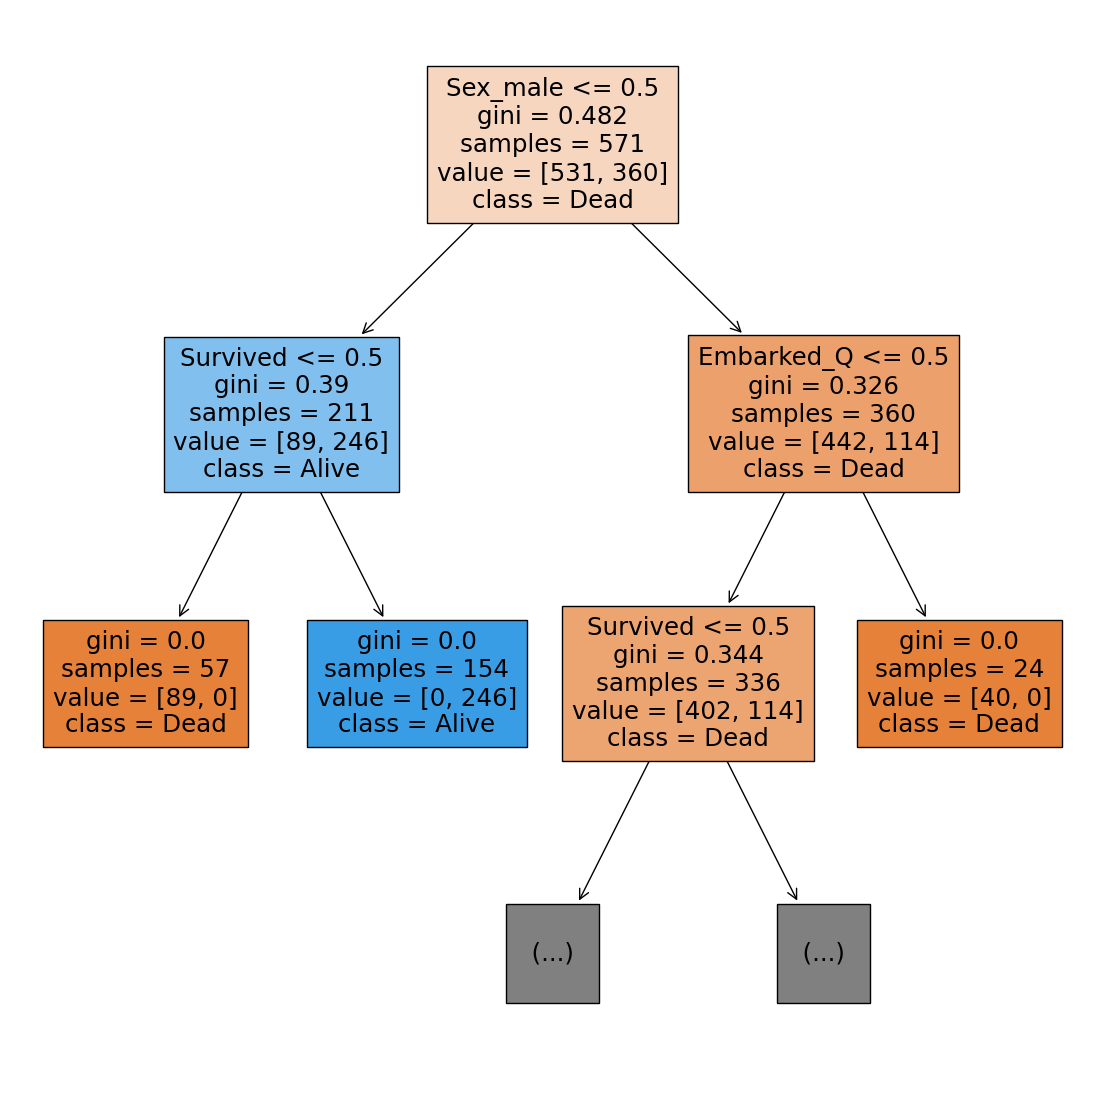

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
dt = clf.estimators_[1]
plt.figure(figsize=(14, 14))
plot_tree(dt, 
     feature_names=datas.columns, 
     class_names=["Dead", "Alive"],
     max_depth=2, 
     filled=True)

<Axes: xlabel='count', ylabel='Sex'>

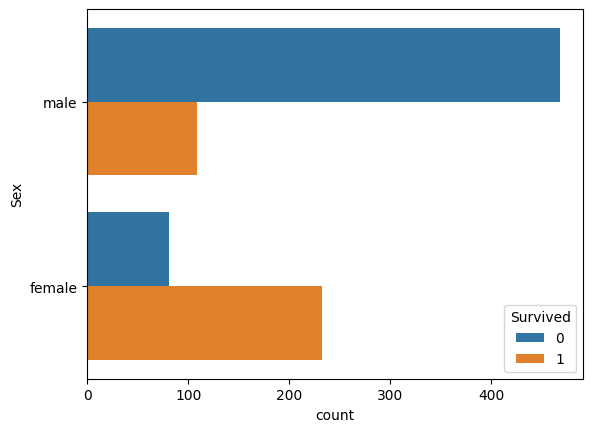

In [21]:
import seaborn as sns
sns.countplot(y=train_df["Sex"], hue=train_df["Survived"])

Text(0.5, 1.0, 'Fare Plot')

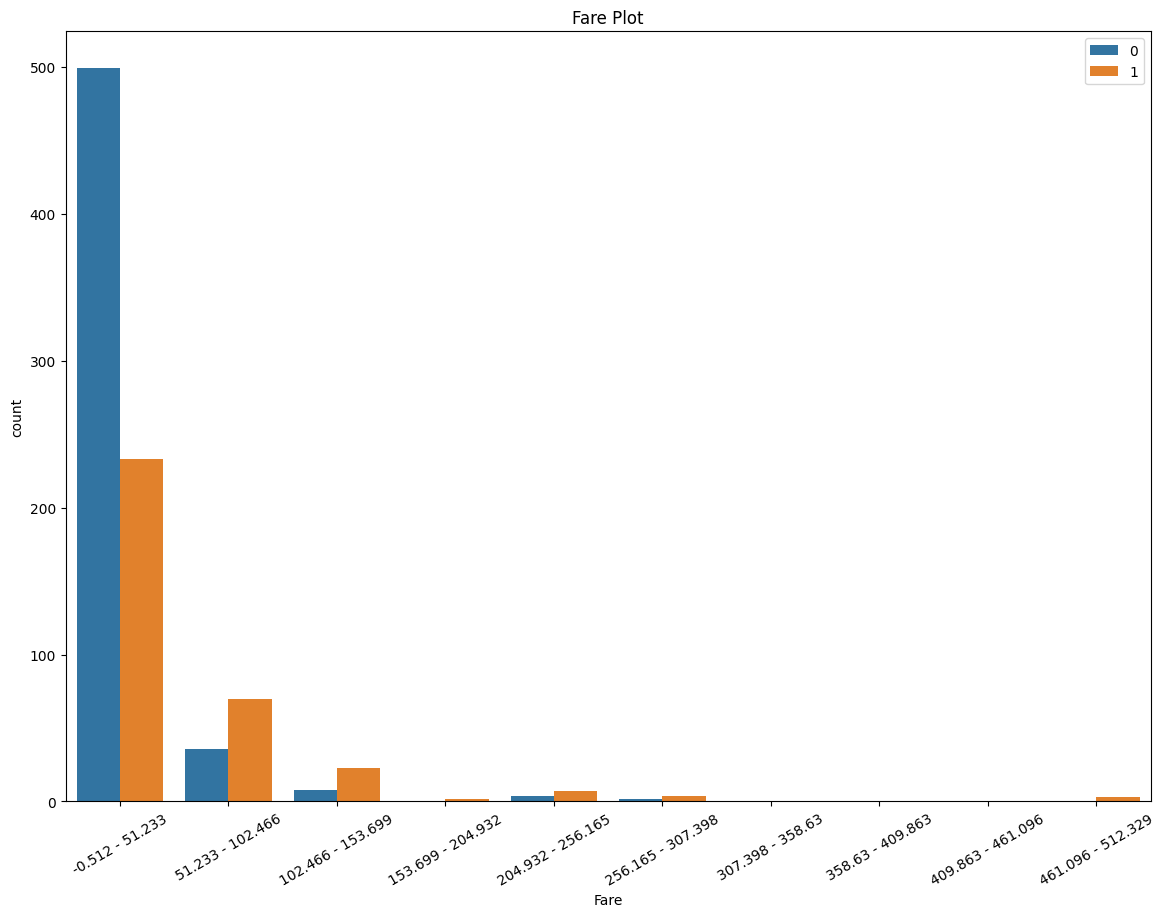

In [22]:
c = pd.cut(train_df["Fare"], bins=10)
def beautify(s):
    return str(s)[1:-1].replace(", ", " - ")
b = c.apply(beautify)
plt.figure(figsize=(14, 10))
sns.countplot(x=b, hue=train_df["Survived"])
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.title("Fare Plot")

Text(0.5, 1.0, 'Fare Plot')

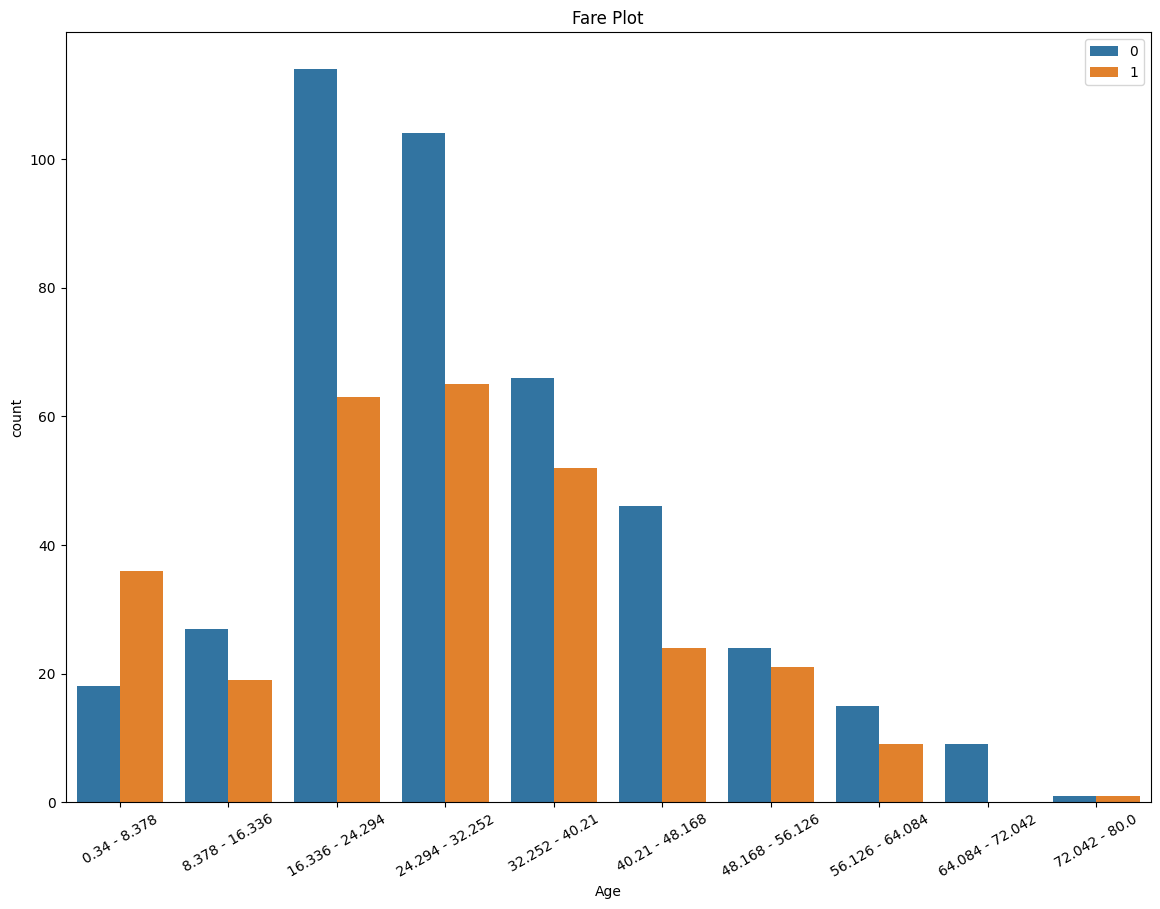

In [23]:
c = pd.cut(train_df["Age"], bins=10)
def beautify(s):
    return str(s)[1:-1].replace(", ", " - ")
b = c.apply(beautify)
plt.figure(figsize=(14, 10))
sns.countplot(x=b, hue=train_df["Survived"])
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.title("Fare Plot")

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
datas_scale = pd.DataFrame(datas_scale, columns=datas.columns)
datas_scale

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0.000000,0.0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.000765,1.0,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.001529,1.0,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.002294,1.0,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.003058,0.0,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.996942,0.0,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.997706,0.0,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.998471,0.0,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.999235,0.0,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
x_scale = datas_scale.iloc[:len(train_df)]
predict_scale = datas_scale.iloc[len(train_df):]

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 200),
}
grid = GridSearchCV(clf, params, cv=10, n_jobs=-1, scoring="neg_log_loss")
grid.fit(x_scale, y)
print(grid.best_score_)
print(grid.best_params_)

-0.08782413124844982
{'n_neighbors': 9}


In [27]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(predict_scale)
ans = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
ans.to_csv("knn.csv", encoding="utf-8", index=False)